In [1]:
import pandas as pd
import geopandas as gpd
import pathlib
from pathlib import Path
import datetime
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import itertools
# set the working directory
BASE_DIR = Path.cwd()

# %matplotlib inline

In [3]:
"""
Looking for a few basic summaries of:
-	Frequency of 0, 1, 2 and 3+ transfers.
-	Frequency of walk access distance to transit, in 200m bins
-	Frequency of walk egress distance from transit, in 200m bins
-	Distribution of unweighted travel times
"""

'\nLooking for a few basic summaries of:\n-\tFrequency of 0, 1, 2 and 3+ transfers.\n-\tFrequency of walk access distance to transit, in 200m bins\n-\tFrequency of walk egress distance from transit, in 200m bins\n-\tDistribution of unweighted travel times\n'

In [37]:
dfboardings = pd.read_csv(BASE_DIR.parent.joinpath("Muni on-board","Muni 2017 TPS Access and Egress Distances.csv"),low_memory=False)
relevant_cols = ['ID', 'operator', 'access_mode', 'dest_purp', 'egress_mode',
                 'orig_purp', 'workers', 'tour_purp', 'tour_purp_case', 'worker_numeric_cat', 'auto_suff',
                 'first_before_operator_detail', 'second_before_operator_detail', 'third_before_operator_detail',
                 'first_after_operator_detail', 'second_after_operator_detail', 'third_after_operator_detail',
                 'first_before_operator', 'second_before_operator', 'third_before_operator',
                 'first_after_operator', 'second_after_operator', 'third_after_operator',
                 'first_before_technology', 'second_before_technology', 'third_before_technology',
                 'first_after_technology', 'second_after_technology', 'third_after_technology',
                 'transfer_from', 'transfer_to', 'first_board_tech', 'last_alight_tech',
                 'boardings', 'day_part', 'trip_weight', 'survey_time',
                 'agg_tour_purp',
                 'access_mode_model', 'egress_mode_model', 'auto_suff_model',
                 'exp_factor', 'boardWeight_2015', 'tripWeight_2015', 'nTransfers', 'period', 'BEST_MODE', 'TRANSFER_TYPE', 'final_tripWeight_2015', 'final_boardWeight_2015', 'final_expansionFactor', 'orig_dest_dist', 'orig_firstboard_dist', 'orig_surveyboard_dist', 'survey_alight_dest_dist', 'last_alight_dest_dist']
dfselected = dfboardings[relevant_cols]

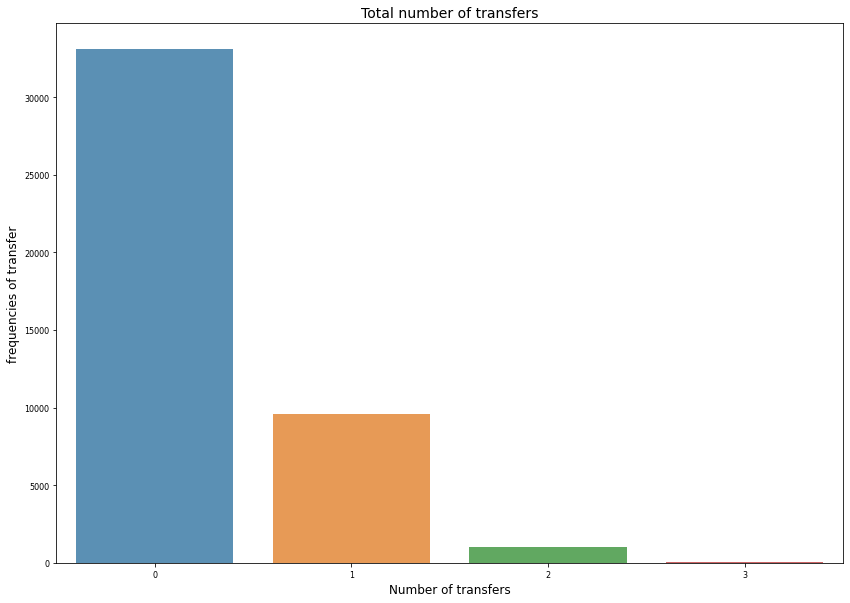

In [68]:
# -	Frequency of 0, 1, 2 and 3+ transfers.
# dfselected["nTransfers"].value_counts(normalize=True).sort_values(ascending=False).plot(kind = 'barh')
nTransfers = dfselected["nTransfers"].value_counts()
# dfsample
nTransfers[3] = nTransfers[4] + nTransfers[3]
nTransfers.pop(4)
# nTransfers

# nTransfers = dfselected["nTransfers"].value_counts(normalize=True)
fig = plt.figure(constrained_layout=True,figsize=(11.69,8.27))
gs = GridSpec(7, 12, figure=fig)
# set palette
palette = itertools.cycle(sns.color_palette())
# color
c = next(palette)
ax1 = fig.add_subplot(gs[:,:])
sns.barplot(x=nTransfers.index, y=nTransfers.values, alpha=0.8)
# sns.barplot(ax=ax1,data=nTransfers,x=(nTransfers.index),y=nTransfers.values,alpha=0.8,color=c)
ax1.set_title('Total number of transfers',fontdict={"size":14})
ax1.set_xlabel(xlabel="Number of transfers",fontdict={"size":12})
ax1.set_ylabel(ylabel="frequencies of transfer",fontdict={"size":12})
ax1.tick_params(labelsize=8)

In [111]:
# Frequency of walk access distance to transit, in 200m bins
dfaccess = dfselected.loc[dfselected["access_mode"]=="walk"].copy()
dfaccess.loc[:,"1st_boarding_dist_ft"] = dfaccess["orig_firstboard_dist"]*5280
dfaccess[["access_mode","orig_dest_dist","orig_firstboard_dist","1st_boarding_dist_ft"]].to_csv(BASE_DIR.parent.joinpath("Muni on-board","Access Trip Distances.csv"))
dfegress = dfselected.loc[dfselected["egress_mode"]=="walk"].copy()
dfegress.loc[:,"lst_egress_dist_ft"] = dfegress["last_alight_dest_dist"]*5280
dfegress[["egress_mode","orig_dest_dist","last_alight_dest_dist","lst_egress_dist_ft"]].to_csv(BASE_DIR.parent.joinpath("Muni on-board","Egress Trip Distances.csv"))

<AxesSubplot:xlabel='orig_firstboard_dist'>

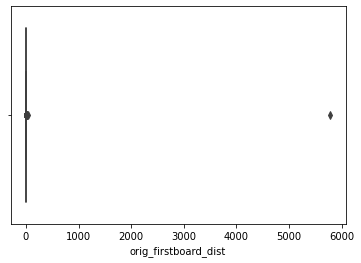

In [120]:
sns.boxplot(x= dfaccess["orig_firstboard_dist"])

<AxesSubplot:xlabel='last_alight_dest_dist'>

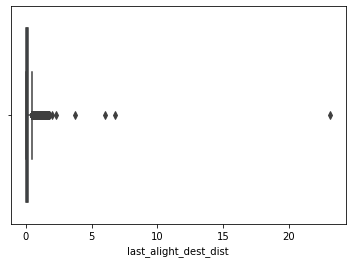

In [121]:
sns.boxplot(x= dfegress["last_alight_dest_dist"])

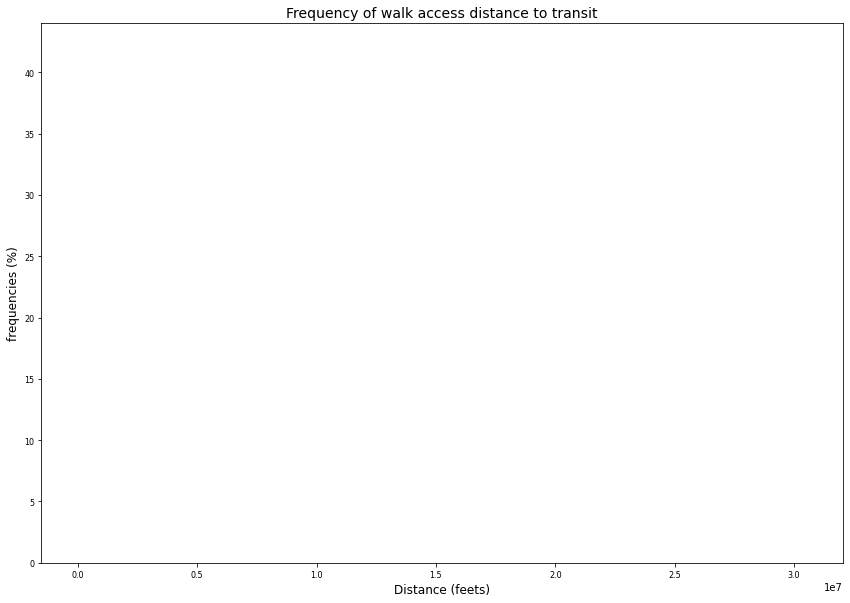

In [112]:
fig = plt.figure(constrained_layout=True,figsize=(11.69,8.27))
gs = GridSpec(7, 12, figure=fig)
# set palette
palette = itertools.cycle(sns.color_palette())
# color
c = next(palette)
ax1 = fig.add_subplot(gs[:,:])

bins_range = range(round(min(dfaccess["1st_boarding_dist_ft"])),round(max(dfaccess["1st_boarding_dist_ft"])),4000)
sns.histplot(ax=ax1,data=dfaccess,x=dfaccess["1st_boarding_dist_ft"],stat='percent',bins=bins_range, color=c)
ax1.set_title('Frequency of walk access distance to transit',fontdict={"size":14})
ax1.set_xlabel(xlabel="Distance (feets)",fontdict={"size":12})
ax1.set_ylabel(ylabel="frequencies (%)",fontdict={"size":12})
ax1.tick_params(labelsize=8)

In [116]:
bins_range = range(round(min(dfaccess["orig_firstboard_dist"])),round(max(dfaccess["orig_firstboard_dist"])),200)
bins_range

range(0, 5781, 200)

In [118]:
dfegress["last_alight_dest_dist"].describe()

count    42975.000000
mean         0.153082
std          0.222098
min          0.000306
25%          0.037511
50%          0.101068
75%          0.192914
max         23.149718
Name: last_alight_dest_dist, dtype: float64

In [119]:
dfaccess["orig_firstboard_dist"].describe()

count    42645.000000
mean         0.291805
std         27.997328
min          0.000069
25%          0.036595
50%          0.096742
75%          0.190421
max       5781.480376
Name: orig_firstboard_dist, dtype: float64

In [81]:
fig = plt.figure(constrained_layout=True,figsize=(11.69,8.27))
gs = GridSpec(7, 12, figure=fig)
# set palette
palette = itertools.cycle(sns.color_palette())
# color
c = next(palette)
ax1 = fig.add_subplot(gs[:,:])

bins_range = range(round(min(dfegress["lst_egress_dist_ft"])),round(max(dfegress["lst_egress_dist_ft"])),200)
sns.histplot(ax=ax1,data=dfaccess,x=dfegress["lst_egress_dist_ft"],stat='percent',bins=bins_range, color=c)
ax1.set_title('Frequency of walk egress distance to destination',fontdict={"size":14})
ax1.set_xlabel(xlabel="Distance (feets)",fontdict={"size":12})
ax1.set_ylabel(ylabel="frequencies (%)",fontdict={"size":12})
ax1.tick_params(labelsize=8)

,ID,operator,access_mode,dest_purp,egress_mode,orig_purp,workers,tour_purp,tour_purp_case,worker_numeric_cat,...,TRANSFER_TYPE,final_tripWeight_2015,final_boardWeight_2015,final_expansionFactor,orig_dest_dist,orig_firstboard_dist,orig_surveyboard_dist,survey_alight_dest_dist,last_alight_dest_dist,orig_firstboard_dist_meters
1,10,SF Muni [LOCAL],walk,escorting,walk,home,one,work,"home origin, work after",1,...,LB_HR,7.917375,23.752124,0.884662,5.433428,0.237783,6.058412,0.007223,0.007223,383.0
2,100,SF Muni [LOCAL],walk,home,walk,other maintenance,zero,other maintenance,origin to home w,0,...,NO_TRANSFERS,25.771842,25.771842,0.992905,0.558603,0.092291,0.092291,0.005086,0.005086,149.0
3,1000,SF Muni [LOCAL],walk,social recreation,walk,home,zero,social recreation,home to destination nw,0,...,LB_LB,12.264525,24.529051,0.937222,1.576316,0.119062,0.119062,0.393891,0.030224,192.0
4,10000,SF Muni [LOCAL],walk,home,walk,work,two,work,work to home,2,...,NO_TRANSFERS,13.749268,13.749268,0.992905,1.629737,0.066227,0.066227,0.070712,0.070712,107.0
5,10001,SF Muni [LOCAL],walk,work,walk,home,two,work,home to work,2,...,NO_TRANSFERS,13.749268,13.749268,0.992905,1.553987,0.140475,0.140475,0.023352,0.023352,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43764,9995,SF Muni [LOCAL],walk,social recreation,walk,home,one,social recreation,home to destination nw,1,...,NO_TRANSFERS,19.280810,19.280810,0.992904,0.782256,0.101703,0.101703,0.007420,0.007420,164.0
43765,9996,SF Muni [LOCAL],walk,eat out,walk,work,two,work,default origin,2,...,NO_TRANSFERS,19.280810,19.280810,0.992904,0.377551,0.037937,0.037937,0.005502,0.005502,61.0
43766,9997,SF Muni [LOCAL],walk,other maintenance,walk,home,one,other maintenance,home to destination nw,1,...,NO_TRANSFERS,19.280810,19.280810,0.992904,0.729543,0.046433,0.046433,0.007420,0.007420,75.0
43767,9998,SF Muni [LOCAL],walk,social recreation,walk,work,one,work,default origin,1,...,NO_TRANSFERS,13.749268,13.749268,0.992905,0.773978,0.015297,0.015297,0.032994,0.032994,25.0


In [6]:
print(dfboardings.columns.to_list())

['ID', 'operator', 'survey_year', 'SURVEY_MODE', 'access_mode', 'depart_hour', 'dest_purp', 'direction', 'egress_mode', 'eng_proficient', 'fare_category', 'fare_medium', 'gender', 'hispanic', 'household_income', 'interview_language', 'onoff_enter_station', 'onoff_exit_station', 'orig_purp', 'persons', 'return_hour', 'route', 'student_status', 'survey_type', 'time_period', 'transit_type', 'trip_purp', 'vehicles', 'weekpart', 'weight', 'work_status', 'workers', 'canonical_operator', 'operator_detail', 'technology', 'approximate_age', 'tour_purp', 'tour_purp_case', 'vehicle_numeric_cat', 'worker_numeric_cat', 'auto_suff', 'first_before_operator_detail', 'second_before_operator_detail', 'third_before_operator_detail', 'first_after_operator_detail', 'second_after_operator_detail', 'third_after_operator_detail', 'first_before_operator', 'second_before_operator', 'third_before_operator', 'first_after_operator', 'second_after_operator', 'third_after_operator', 'first_before_technology', 'secon

In [7]:
dfboardings

,ID,operator,survey_year,SURVEY_MODE,access_mode,depart_hour,dest_purp,direction,egress_mode,eng_proficient,...,TRANSFER_TYPE,hh_id,final_tripWeight_2015,final_boardWeight_2015,final_expansionFactor,orig_dest_dist,orig_firstboard_dist,orig_surveyboard_dist,survey_alight_dest_dist,last_alight_dest_dist
0,1,SF Muni [LOCAL],2017,LB,knr,NaN,work,NaN,walk,NaN,...,LB_HR,69386,12.581647,25.163294,0.937222,9.355325,1.007234,9.321404,0.293603,0.293603
1,10,SF Muni [LOCAL],2017,LB,walk,NaN,escorting,NaN,walk,VERY WELL,...,LB_HR,69387,7.917375,23.752124,0.884662,5.433428,0.237783,6.058412,0.007223,0.007223
2,100,SF Muni [LOCAL],2017,LB,walk,8.0,home,NaN,walk,NaN,...,NO_TRANSFERS,69388,25.771842,25.771842,0.992905,0.558603,0.092291,0.092291,0.005086,0.005086
3,1000,SF Muni [LOCAL],2017,LB,walk,NaN,social recreation,NaN,walk,NOT WELL,...,LB_LB,69389,12.264525,24.529051,0.937222,1.576316,0.119062,0.119062,0.393891,0.030224
4,10000,SF Muni [LOCAL],2017,LB,walk,11.0,home,NaN,walk,VERY WELL,...,NO_TRANSFERS,69390,13.749268,13.749268,0.992905,1.629737,0.066227,0.066227,0.070712,0.070712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43764,9995,SF Muni [LOCAL],2017,LB,walk,NaN,social recreation,NaN,walk,NaN,...,NO_TRANSFERS,113150,19.280810,19.280810,0.992904,0.782256,0.101703,0.101703,0.007420,0.007420
43765,9996,SF Muni [LOCAL],2017,LB,walk,NaN,eat out,NaN,walk,NaN,...,NO_TRANSFERS,113151,19.280810,19.280810,0.992904,0.377551,0.037937,0.037937,0.005502,0.005502
43766,9997,SF Muni [LOCAL],2017,LB,walk,NaN,other maintenance,NaN,walk,NaN,...,NO_TRANSFERS,113152,19.280810,19.280810,0.992904,0.729543,0.046433,0.046433,0.007420,0.007420
43767,9998,SF Muni [LOCAL],2017,LB,walk,NaN,social recreation,NaN,walk,NaN,...,NO_TRANSFERS,113153,13.749268,13.749268,0.992905,0.773978,0.015297,0.015297,0.032994,0.032994
